# Rhomboid Bifiltration (multicover)

The Rhomboid Bifiltration is a topologically equivalent bifiltration to the multicover bifiltration, introduced in [[Computing the Multicover Bifiltration]](https://doi.org/10.4230/LIPIcs.SoCG.2021.27), whose code is available [here](https://github.com/geoo89/rhomboidtiling).

In [1]:
import numpy as np
import gudhi as gd
import multipers as mp
import matplotlib.pyplot as plt

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.


## Definition

Let $P$ be a point cloud in some metric space $(X,d)$. 
The multicover bifiltration is the bifiltration $F$ indexed over 
$\mathbb{R} \times \mathbb{N}^{\mathrm{op}}$, defined as follows:


\begin{align*}
\forall (r,k)\in \mathbb{R} \times \mathbb{N}^{\mathrm{op}}, 
\quad
& F_{r,k}=\bigcup_{\substack{i_1, \dots, i_k\\ \forall j_1\neq j_2, i_{j_1} \neq i_{j_2}}} \bigcap_{j=1}^k B(p_{i_j}, r)\\
&= \left\{ x\in X \mid \exists k \textnormal{ distinct points } (p_i)_{1\le i \le k} \in P, \textnormal{ s.t. } \max_i d(p_i, x)\le r\right\}
\end{align*}


Note that this filtration is **not** 1-critical/free. The Rhomboid Tiling bifiltration is a topologically equivalent 1-critical bifiltration, that we do not develop here.

We identify $\mathbb N^{\mathrm{op}}$ with $-\mathbb N$.

## A first example

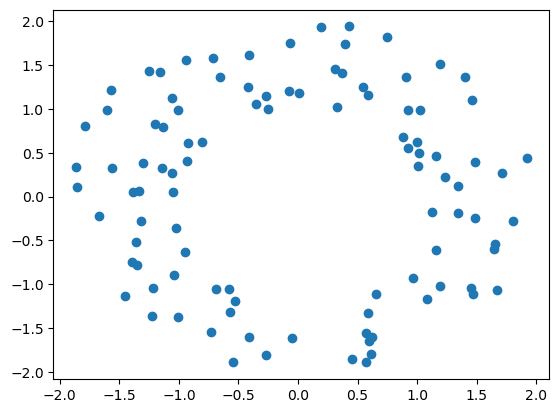

In [2]:
np.random.seed(0)
x = mp.data.noisy_annulus(100,0, dim=2) # dataset
plt.scatter(*x.T)
k_max = 30 # the maximum of ball intersection to look at
degree=1 # homological degree

In [3]:
s = mp.filtrations.RhomboidBifiltration(x, k_max=k_max, degree=degree)
len(s)

715517

This filtration is very large in general ; before computing an invariant it is generally recommended to simplify it, via a sequence of squeezes or minimal presentations.

In [4]:
multicover = (s
    .grid_squeeze(
        # resolution=200, # coarsens the filtration grid
        # strategy="regular_closest", 
        threshold_min=[0, -k_max], # thresholds the filtration values
        threshold_max=[4, 0],
    )
    .minpres(degree) # mpfree
    .astype(vineyard=True) # for mma
)
len(multicover)

59380

### Hilbert Function

The signed barcodes of this filtration are not very readable

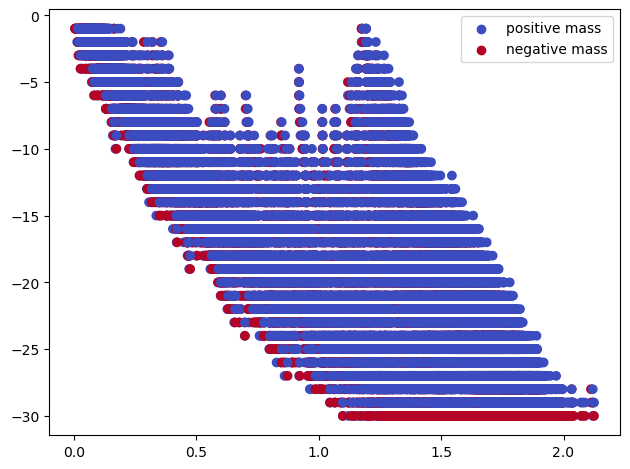

In [5]:
sm, = mp.signed_measure(multicover, degree=degree, plot=True);

The induced Hilbert function suggest a significant cycle 

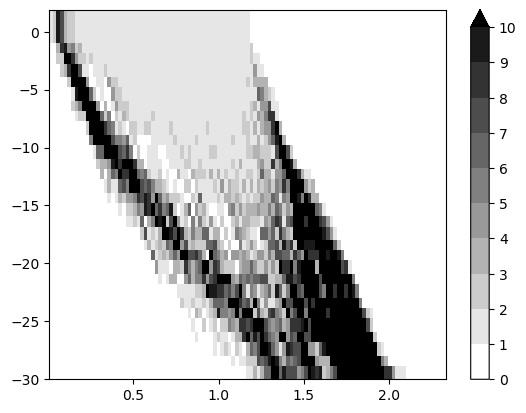

In [6]:
mp.point_measure.integrate_measure(*sm, plot=True);

### Module approximation

/var/folders/w6/5k5w13s94bq0dfsx2xzqxcsh0000gn/T/ipykernel_7492/2670604959.py:1: UserWarning: (copy warning) Got a squeezed input. 
  mod = mp.module_approximation(multicover)


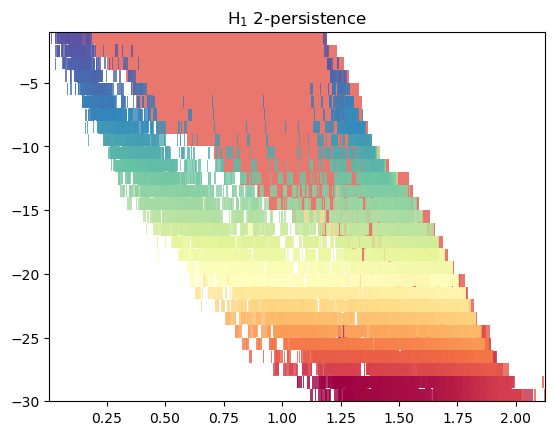

In [7]:
mod = mp.module_approximation(multicover)
mod.plot()

This is a bit bloated, so we can just plot the summand larger than a given threshold. We clearly recover the inital cycle here.

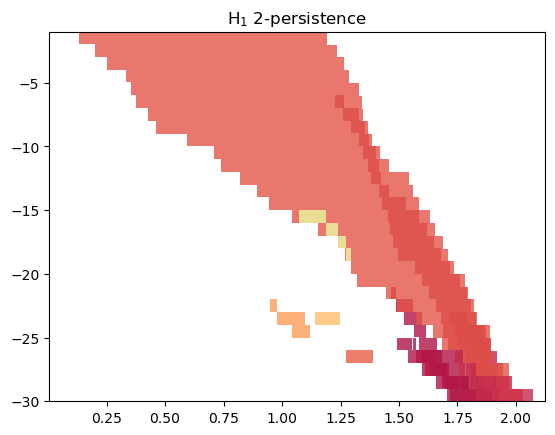

In [8]:
mod.plot(min_persistence = .1)

Another alternative is to look at a representation of MMA, which weights the summands w.r.t. their "size".

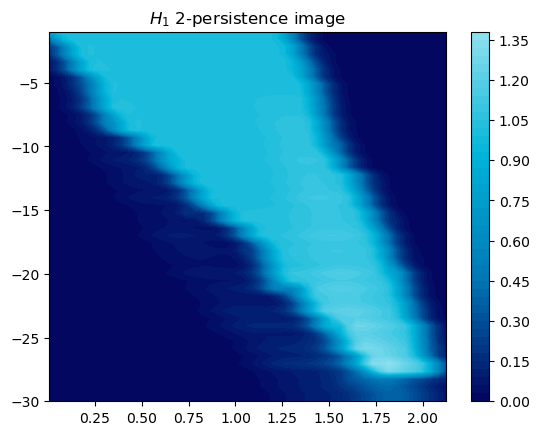

In [9]:
mod.representation(plot=True, degrees=[1]);

### Scaling

As far as I tested, this filtration doesn't scale much more than with a few hundreds of points.